In [2]:
%run setup
%load_ext autoreload
%autoreload 2

In [3]:
from plotly.offline import iplot
import numpy as np
from nlp_intro.data import load_diskusjon_no_data
from nlp_intro.logistic_regression import fit
import plotly.graph_objects as go
from nlp_intro.figure_factory import Linear2D2ClassModelPlotter, create_confusion_matrix_fig

In [4]:
from plotly import __version__
__version__

'4.0.0'

In [5]:
model = lambda x: 2*x+1

In [6]:
features, labels = create_2d_2class_data((0,1), (0,4), 100, model, .0)

In [10]:
plotter = Linear2D2ClassModelPlotter(features, labels, model, height=700, width=700)

In [11]:
plotter.enable_model_areas()

In [12]:
plotter()

FigureWidget({
    'data': [{'fill': 'toself',
              'fillcolor': 'rgba(255,65,54,0.5)',
             …

In [17]:
x, y, k = fit(features, labels, lr=1, max_iter=10000, verbose=False)
print(f"y = {-x/y:.2f}x + {-k/y:.2f}")

y = 2.00x + 1.07


In [30]:
urls = [2, 3, 5]


def gen1(n_valid):
    yield from gen2(n_valid)
    
def gen2(n_valid):
    i = 0
    n = 0
    while 1:
        was_walid = yield i
        yield "foo"
        print(i, was_walid)
        if was_walid:
            n += 1
            if n == n_valid:
                break
        i += 1  
        
def foo():
    gen = gen2(5)
    ret = []
    for x in gen:
        if x not in urls:
            ret.append(x)
            print(gen.send(True))
        else:
            print(gen.send(False))
    return ret

foo()

2
0 True
2
1 True
2 False
3 False
2
4 True
5 False
2
6 True
2
7 True


[0, 1, 4, 6, 7]

In [31]:
from urllib.parse import urlparse

In [33]:
url = "https://www.diskusjon.no/index.php?s=f87be2781d8cb7938acd6dfb4651bdab&showtopic=541772"
url_parsed = urlparse(url)

In [35]:
url_parsed

ParseResult(scheme='https', netloc='www.diskusjon.no', path='/index.php', params='', query='s=f87be2781d8cb7938acd6dfb4651bdab&showtopic=541772', fragment='')

In [36]:
import re

In [38]:
re.sub(r"(?<=\?)s=[a-z0-9]+&", "", url)

'https://www.diskusjon.no/index.php?showtopic=541772'

In [39]:
import requests

In [41]:
resp = requests.get("https://www.diskusjon.no/index.php", params=dict(showforum=61))

In [42]:
print(resp)

<Response [200]>


In [43]:
resp

<Response [200]>

In [44]:
resp

<Response [200]>

In [61]:
re.search("(?<=showtopic=)\d+", "jfirjgirshowtopic=123").group()

'123'

In [69]:
from time import time
import time

In [70]:
time()

TypeError: 'module' object is not callable

In [71]:
time.utcnow()

AttributeError: module 'time' has no attribute 'utcnow'

In [74]:
from datetime import datetime

1565426652041641.0

In [80]:
print(datetime.utcnow().timestamp() * 1e6)
print(datetime.now().timestamp() * 1e6)

1565426731068326.0
1565433931068326.0


In [83]:
datetime.utcnow().isoformat() + "+00"

'2019-08-10T10:51:12.912259+00'

# Diskusjon no

In [22]:
df = load_diskusjon_no_data(-1)

In [6]:
df.scrape_time.dtype

datetime64[ns, UTC]

In [7]:
df.shape

(15531, 7)

In [8]:
df.label.nunique()

165

In [9]:
df.label.value_counts()

Data > IKT-drift og sikkerhet                                              100
Data > Brukerbidrag > Arbeidslogger (data og elektronikk) - Kommentarer    100
Fotball, sport og trening > Fotball > Internasjonal fotball                100
Mobil og nettbrett > Hjelp til skadet telefon eller nettbrett              100
Data > Operativsystemer                                                    100
                                                                          ... 
Kultur > Musikk > Arbeidslogger for instrumenter og studio                   3
Tilbakemeldinger > Nyheter om forumet > Føringer og avgjørelser              3
Foto og video > Fotografering > Ditt fotogalleri                             2
Data > Datautstyr                                                            2
Samfunn > Politikk og samfunn > Debattimen                                   1
Name: label, Length: 165, dtype: int64

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [13]:
model = make_pipeline(
    TfidfVectorizer(ngram_range=(4, 4), analyzer="char", min_df=3, max_df=.6), LogisticRegression()
)

In [23]:
vc = df.label.value_counts()
keep_labels = vc[vc >= 10].index
df2 = df[df.label.isin(keep_labels)]

In [25]:
df2.shape

(15512, 7)

In [26]:
texts = df2[["title", "body"]].apply(lambda texts: "\n".join(texts), axis=1)
labels = df2.label

In [27]:
model

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.6, max_features=None,
                                 min_df=3, ngram_range=(4, 4), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

In [28]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=.2, stratify=labels, random_state=123)

In [29]:
model.fit(X_train, y_train)

C:\Users\peter\Anaconda3\envs\nlp-intro\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\peter\Anaconda3\envs\nlp-intro\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.6, max_features=None,
                                 min_df=3, ngram_range=(4, 4), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

In [30]:
y_pred = model.predict(X_test)

In [31]:
(y_test == y_pred).mean()

0.5327102803738317

In [36]:
fig = create_confusion_matrix_fig(y_test, y_pred)

In [37]:
from plotly.offline import iplot

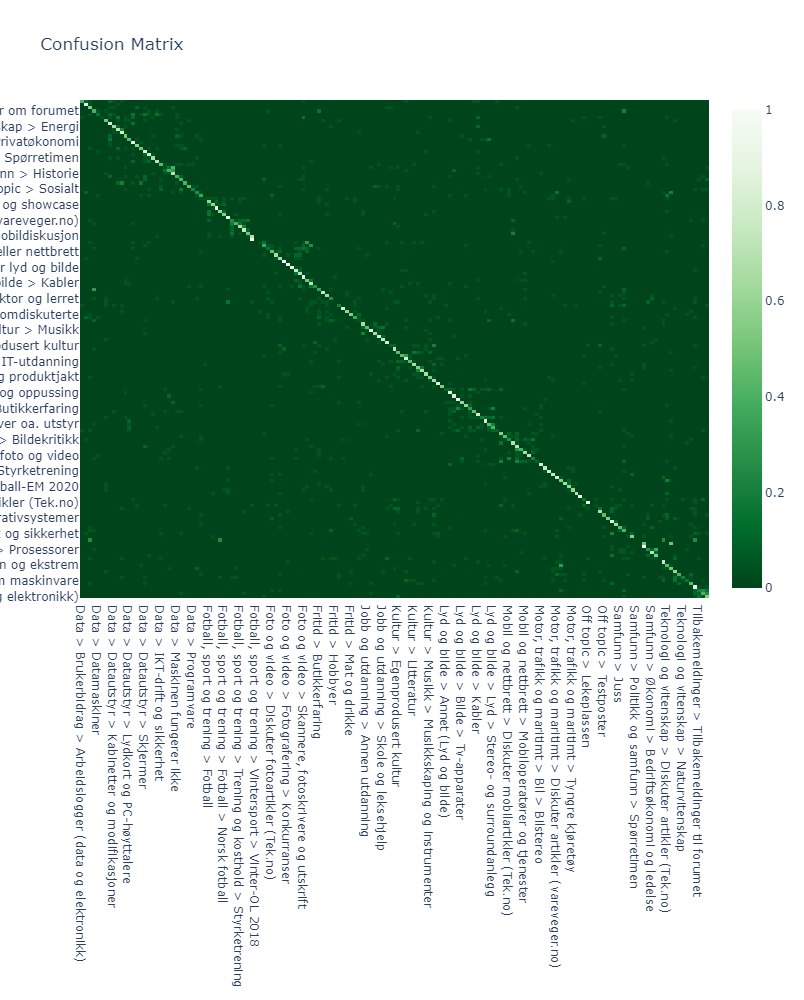

In [38]:
iplot(fig)

# Ngram Tokenizer

In [1]:
%run setup

In [2]:
from nlp_intro.transformers import NgramCountVectorizer
from nlp_intro.data import load_diskusjon_no_data
from spacy.lang.nb.stop_words import STOP_WORDS

C:\Users\peter\Anaconda3\envs\nlp-intro\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



In [3]:
df = load_diskusjon_no_data(-1)

In [4]:
vec = NgramCountVectorizer(phrases_common_terms=STOP_WORDS, ngram_range=(1, 2), min_df=3, max_df=.6, token_pattern="[^\W_]+")

In [5]:
%%time
docs = vec.fit_transform(df.body)

Wall time: 1min 20s


In [6]:
from scipy.sparse import find
import pandas as pd
import numpy as np

def transform_with_vec(text, vec):
    assert isinstance(text, str)
    text_vec = vec.transform([text])[0]
    _, ix, values = find(text_vec)
    feats = np.asarray(vec.get_feature_names())
    return pd.DataFrame([values], columns=feats[ix])

In [11]:
vec.ngram_range = (2,2)

In [15]:
transform_with_vec("Jeg har windows 10 på min gaming pc. Gaming pc er fet. Liker du windows vista?", vec)

,du,fet,gaming_pc,liker,min,windows_10,windows_vista
0,1,1,2,1,1,1,1


In [16]:
find(vec.transform(["Hey dude", "WHats up", "Not much"])[0])

Splitting documents into sentences and tokenizing sentences
Transforming using phrasers
FLattening documents


(array([0, 0]), array([ 8239, 15404]), array([1, 1], dtype=int64))

In [49]:
vec.get_feature_names()

['0',
 '00',
 '000',
 '0000',
 '000_i_året',
 '000_km',
 '000_kr',
 '000km',
 '000kr',
 '001',
 '0010',
 '007',
 '00_belgia',
 '00_brasil',
 '00_england',
 '00_kroatia',
 '00_portugal',
 '00_spania',
 '00_uruguay',
 '01',
 '01_01',
 '01_30',
 '02',
 '02_00',
 '02_15',
 '03',
 '03003',
 '03_00',
 '04',
 '04_10',
 '05',
 '05_10',
 '06',
 '06_05',
 '06_09',
 '06_10',
 '07',
 '07_10',
 '07_2014',
 '08',
 '08_09',
 '09',
 '09_00',
 '09_12',
 '0_0',
 '0_1',
 '0_2',
 '0_24',
 '0_3',
 '0_4',
 '0_5',
 '0_7',
 '0_nedlastinger',
 '0_porter',
 '0a',
 '0ghz',
 '0kr',
 '0l',
 '0mm',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000_1000',
 '1000_2000',
 '1000_kr',
 '1000_lappen',
 '1000d',
 '1000gb',
 '1000kr',
 '1000mbps',
 '1000mhz',
 '1000w',
 '1000x',
 '1000xm3',
 '1001',
 '100_000',
 '100_200',
 '100_ganger',
 '100_hz',
 '100_kg',
 '100_kr',
 '100_sikker',
 '100_stilling',
 '100c',
 '100d',
 '100g',
 '100gb',
 '100hz',
 '100k',
 '100kg',
 '100km',
 '100kr',
 '100mb',
 '100mbit',
 '100mb

In [10]:
len(df.body)

15531

In [11]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '00000000000a',
 '00000000000b',
 '00000001',
 '000001',
 '000002',
 '0000055347',
 '0000069560',
 '0000078082',
 '0000087529',
 '0001',
 '00012',
 '00051',
 '0005990913',
 '0005991433',
 '000_000',
 '000_hz',
 '000_km',
 '000_kr',
 '000_kroner',
 '000_måneden',
 '000_året',
 '000a',
 '000gb',
 '000km',
 '000kr',
 '000m',
 '001',
 '0010',
 '0015',
 '0024',
 '003',
 '0030',
 '003087',
 '0048724',
 '00489d2de83a',
 '005',
 '006002080',
 '006002092',
 '006002130',
 '007',
 '007cd',
 '007dc',
 '008',
 '00822',
 '0082j',
 '0089912200',
 '009',
 '009ba0',
 '00_belgia',
 '00_brasil',
 '00_dommer',
 '00_england',
 '00_estádio',
 '00_frankrike',
 '00_freestyle',
 '00_kombinert',
 '00_kortbaneløp',
 '00_kroatia',
 '00_medaljeseremoni',
 '00_portugal',
 '00_regler',
 '00_skøyter',
 '00_snowboard',
 '00_spania',
 '00_tyskland',
 '00_uruguay',
 '00a',
 '00am',
 '00gb',
 '00ghz',
 '00i',
 '00p',
 '00pg',
 '00pm',
 '00x',
 '01',
 '010',
 '01011001',
 '01051',
 '010g